# Lab session 3: data exploration and visualisation

## Introduction 

The purpose of this lab session is to provide you with an opportunity to gain experience in **data exploration** and **data visualisation** using typical Python libraries.

This session starts with a tutorial that uses examples to introduce you to the practical knowledge that you will need for the corresponding assignment. We highly recommend that you read the following tutorials if you need a gentler introduction to the libraries that we use:
- [Numpy quickstart tutorial](https://numpy.org/devdocs/user/quickstart.html)
- [Numpy: basic broadcasting](https://numpy.org/doc/stable/user/basics.broadcasting.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html)
- [Matplotlib](https://matplotlib.org/tutorials/introductory/pyplot.html)
- [Seaborn](https://seaborn.pydata.org/tutorial/relational.html)
- [Scikit-learn](https://scikit-learn.org/stable/tutorial/basic/tutorial.html)

## Submission instructions

- The last section of this notebook includes the first part of the assessed assignment for day 2.
- There will be 4 assessed assignments. Each assignment corresponds to 10% of your final grade.
- The exam corresponds to the remaining 60% of your final grade.
- **PLAGIARISM** <ins>leads to irreversible non-negotiable failure in the module</ins> (if you are unsure about what constitutes plagiarism, please ask). 
- The deadline for submitting each assignment is defined on QM+.
- Penalties for late submissions will be applied in accordance with the School policy. The submission cut-off date is 7 days after the deadline.
- You should submit a **report** with your solutions to the assignment included in the last section of this notebook. The report should be a single **pdf** file. Other formats (such as doc, docx, or ipynb) are **not** acceptable. 
- The report should be excellently organized and identified with your name, student number, assignment number, and module identifier. When applicable, question numbers should precede the corresponding answers. 
- Please name your report file according to the following convention: Assignment[Number]-[Student Name]-[Student Number].pdf
- Submissions should be made through QM+. Submissions by e-mail will be ignored.
- Please always check whether the report file was uploaded correctly to QM+.
- Cases of **extenuating circumstances** have to go through the proper procedure in accordance with the School policy. Only cases approved by the School in due time will be considered.

## 1 Exploring and visualising the graduation rate dataset


In order to present typical Python functionalities for data exploration and data visualisation, we will use the graduation rate dataset (http://roycekimmons.com/tools/generated_data) as part of a working example.

Note that this is a **synthetic** dataset that presents a familiar setting for the sake of simplicity. Therefore, this dataset should not be used to draw conclusions about students in the real world.

### 1.1 Loading the graduation rate dataset

The graduation rate dataset is stored in a file called ``data/graduation_rate.csv``, which should be uploaded to the virtual machine. You can inspect this file using any text editor. The file contains 1001 lines. The first line contains the name of the features, separated by commas. The remaining lines contain one observation per line. The values for the features of each observation are also separated by lines.

The library ``pandas`` has a convenient function called ``read_csv``, which expects a file that follows the convention described above. This function returns a ``DataFrame``, which represents the data set.

The function ``display`` used within a notebook is similar to the Python function ``print``, but presents a ``DataFrame`` in a much more convenient format. By default, only the first five rows and the last five rows of a large ``DataFrame`` are shown.

This initial inspection reveals that most features are numerical, except for the feature ``parental level of education``, which has multiple text values. In order to display the valid values for this feature, we select the corresponding column from the ``DataFrame``, and use the method ``Series.unique``. This method returns the unique values across a ``Series``.

In [2]:
# Loading dataset (http://roycekimmons.com/tools/generated_data)
import pandas as pd

df = pd.read_csv('graduation_rate.csv')

print('Dataset (head and tail):')
display(df)

print('\nParental levels of education:')
print(df['parental level of education'].unique())


Dataset (head and tail):


,ACT composite score,SAT total score,parental level of education,parental income,high school gpa,college gpa,years to graduate
0,30,2206,master's degree,94873,4.0,3.8,3
1,26,1953,some college,42767,3.6,2.7,9
2,28,2115,some high school,46316,4.0,3.3,5
3,33,2110,some high school,52370,4.0,3.5,4
4,30,2168,bachelor's degree,92665,4.0,3.6,4
...,...,...,...,...,...,...,...
995,30,1967,high school,49002,3.8,3.5,6
996,28,2066,some college,83438,3.9,3.5,4
997,27,1971,high school,68577,3.6,3.7,5
998,30,2057,some college,56876,3.8,3.6,3



Parental levels of education:
["master's degree" 'some college' 'some high school' "bachelor's degree"
 "associate's degree" 'high school']


In [3]:
df.head(2)

,ACT composite score,SAT total score,parental level of education,parental income,high school gpa,college gpa,years to graduate
0,30,2206,master's degree,94873,4.0,3.8,3
1,26,1953,some college,42767,3.6,2.7,9


### 1.2 Pre-processing features

In order to establish a natural ordering over ``parental level of education``, the corresponding column of the ``DataFrame`` is substituted by a column of ordinal features created using the function ``pd.Categorical``.

In [4]:
education_order = ['some high school', 'high school', 'some college', "associate's degree", "bachelor's degree", "master's degree"]

df['parental level of education'] = pd.Categorical(df['parental level of education'],
                                                   ordered=True,
                                                   categories=education_order)

display(df['parental level of education'])


0        master's degree
1           some college
2       some high school
3       some high school
4      bachelor's degree
             ...        
995          high school
996         some college
997          high school
998         some college
999     some high school
Name: parental level of education, Length: 1000, dtype: category
Categories (6, object): ['some high school' < 'high school' < 'some college' < 'associate's degree' <
                         'bachelor's degree' < 'master's degree']

In [5]:
df.head(10)

,ACT composite score,SAT total score,parental level of education,parental income,high school gpa,college gpa,years to graduate
0,30,2206,master's degree,94873,4.0,3.8,3
1,26,1953,some college,42767,3.6,2.7,9
2,28,2115,some high school,46316,4.0,3.3,5
3,33,2110,some high school,52370,4.0,3.5,4
4,30,2168,bachelor's degree,92665,4.0,3.6,4
5,25,1854,bachelor's degree,76340,3.5,3.3,4
6,30,2016,associate's degree,65867,3.8,3.7,3
7,23,1722,high school,64495,3.0,3.3,5
8,27,1880,some college,78662,3.5,3.3,4
9,28,1994,associate's degree,61772,3.7,3.4,4


In [ ]:
display(df.corr())

,ACT composite score,SAT total score,parental income,high school gpa,college gpa,years to graduate
ACT composite score,1.000000,0.885884,0.183879,0.874206,0.507349,-0.129880
SAT total score,0.885884,1.000000,0.247556,0.910425,0.518257,-0.125523
parental income,0.183879,0.247556,1.000000,0.227238,0.460863,-0.239500
high school gpa,0.874206,0.910425,0.227238,1.000000,0.492489,-0.119524
college gpa,0.507349,0.518257,0.460863,0.492489,1.000000,-0.467499
years to graduate,-0.129880,-0.125523,-0.239500,-0.119524,-0.467499,1.000000


### 1.3 Data summarisation

The method ``DataFrame.describe`` can be used to compute most of the univariate summaries that we have covered during the lectures. For each feature, this method computes the mean, standard deviation, minimum, maximum, median, lower quartile, and upper quartile. 

Note that ``DataFrame.describe`` detects and omits the categorical feature ``parental level of education``, since those summaries would not be useful. Instead, it is possible to use the method ``Series.value_counts`` to derive the frequency of each value of this feature.

The method ``DataFrame.corr`` can be used to compute the correlation matrix for the (numerical) features in the dataset.

In [6]:
print('Univariate summaries:')
display(df.describe())
print("Frequency of parental levels of education:")
freq_education = df['parental level of education'].value_counts()/len(df)
display(freq_education)

print("\nCorrelation coefficients:")
display(df.corr())

Univariate summaries:


,ACT composite score,SAT total score,parental income,high school gpa,college gpa,years to graduate
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,28.557000,1997.803000,66564.905000,3.712900,3.36990,4.992000
std,2.776051,142.736442,19451.865744,0.283415,0.23622,1.403533
min,19.000000,1498.000000,1882.000000,2.700000,2.70000,3.000000
25%,27.000000,1907.750000,53443.000000,3.500000,3.20000,4.000000
50%,29.000000,1999.000000,65441.000000,3.800000,3.40000,5.000000
75%,30.000000,2092.250000,79845.250000,4.000000,3.50000,6.000000
max,36.000000,2397.000000,120391.000000,4.000000,4.00000,10.000000


Frequency of parental levels of education:


some college          0.224
associate's degree    0.213
high school           0.196
some high school      0.196
bachelor's degree     0.103
master's degree       0.068
Name: parental level of education, dtype: float64


Correlation coefficients:


,ACT composite score,SAT total score,parental income,high school gpa,college gpa,years to graduate
ACT composite score,1.000000,0.885884,0.183879,0.874206,0.507349,-0.129880
SAT total score,0.885884,1.000000,0.247556,0.910425,0.518257,-0.125523
parental income,0.183879,0.247556,1.000000,0.227238,0.460863,-0.239500
high school gpa,0.874206,0.910425,0.227238,1.000000,0.492489,-0.119524
college gpa,0.507349,0.518257,0.460863,0.492489,1.000000,-0.467499
years to graduate,-0.129880,-0.125523,-0.239500,-0.119524,-0.467499,1.000000


### 1.4 Table visualisation

The method ``DataFrame.sort_values`` can be used to sort the rows of a ``DataFrame`` by the value of a specific feature, in ascending or descending order. For instance, we can use this method to sort students by ``college gpa``.

We can also use **slicing** to select a range of observations from a ``DataFrame``. For example, we may sort the students by increasing ``parental income`` and then select the first ten students (with the lowest ``parental income``).

When a ``DataFrame`` is indexed by a list of boolean values that has as many elements as the ``DataFrame`` has rows, only the rows that correspond to ``True`` values are returned. This also works when the list used for indexing is represented by a ``Series``. This functionality can be used to select rows that pass a test based on their features. For example, we may use it to select the students whose parents are educated beyond high school. 

The method ``DataFrame.groupby`` provides a simple way to partition observations into groups based on the value of chosen categorical features (for example, ``parental level of education``) and operating independently on each group (for example, computing the mean of the numerical features independently for each group).

In [7]:
#print(df.to_latex()) # Print a table for use with LaTeX
print('Sorting by college gpa:')
display(df.sort_values(by='college gpa', ascending=False))

print('Selecting the ten students with lowest parental income :')
display(df.sort_values(by='parental income', ascending=True)[0:10])

print('Sorting by high school gpa the students whose parents are educated beyond high school')
# Note that a boolean sequence can be used to index a DataFrame
display(df[df['parental level of education'] > 'high school'].sort_values(by='high school gpa', ascending=False))

print('Grouping by parental level of education and computing the mean for other features:')
display(df.groupby('parental level of education').mean())

Sorting by college gpa:


,ACT composite score,SAT total score,parental level of education,parental income,high school gpa,college gpa,years to graduate
378,30,2219,master's degree,109282,4.0,4.0,5
161,36,2397,master's degree,94847,4.0,4.0,4
588,34,2298,associate's degree,116853,4.0,4.0,4
352,31,2185,associate's degree,75932,4.0,3.9,3
632,33,2121,some high school,80375,4.0,3.9,3
...,...,...,...,...,...,...,...
678,24,1681,some high school,26446,3.1,2.7,6
280,22,1712,some college,59960,3.0,2.7,7
271,22,1699,some high school,61529,3.0,2.7,5
1,26,1953,some college,42767,3.6,2.7,9


Selecting the ten students with lowest parental income :


,ACT composite score,SAT total score,parental level of education,parental income,high school gpa,college gpa,years to graduate
171,31,2011,some high school,1882,4.0,3.0,6
433,27,1978,some high school,15562,3.7,3.2,9
676,26,1895,high school,15896,3.3,3.0,5
688,23,1714,some high school,17101,3.2,3.1,7
346,29,1816,some high school,17706,3.5,3.3,5
587,27,2046,high school,21708,3.8,3.4,4
687,32,2118,some high school,23320,4.0,3.5,5
212,31,2117,high school,24885,3.9,3.4,5
955,30,2004,some high school,25024,3.8,3.3,5
63,28,2016,some high school,25286,3.8,3.2,6


Sorting by high school gpa the students whose parents are educated beyond high school


,ACT composite score,SAT total score,parental level of education,parental income,high school gpa,college gpa,years to graduate
0,30,2206,master's degree,94873,4.0,3.8,3
832,30,2153,some college,66142,4.0,3.2,5
363,28,2037,bachelor's degree,96147,4.0,3.7,4
360,31,2156,master's degree,108696,4.0,3.4,5
761,31,2096,associate's degree,48517,4.0,3.6,4
...,...,...,...,...,...,...,...
751,22,1682,associate's degree,66937,3.0,2.8,9
353,20,1646,bachelor's degree,64927,3.0,2.8,6
370,21,1714,associate's degree,89275,2.9,3.1,4
228,23,1644,associate's degree,101997,2.8,3.2,9


Grouping by parental level of education and computing the mean for other features:


,ACT composite score,SAT total score,parental income,high school gpa,college gpa,years to graduate
parental level of education,,,,,,
some high school,26.969388,1895.321429,50151.229592,3.514796,3.217347,5.489796
high school,28.377551,1967.341837,57755.265306,3.653061,3.364286,5.035714
some college,28.513393,2007.183036,64733.138393,3.742857,3.351339,4.861607
associate's degree,29.511737,2044.460094,74932.685446,3.807981,3.441315,4.877934
bachelor's degree,29.174757,2066.320388,84635.728155,3.832039,3.438835,4.660194
master's degree,29.867647,2100.161765,91718.632353,3.879412,3.558824,4.720588


### 1.5 Histograms

The library ``seaborn`` provides a high-level interface for drawing appealing graphics using ``matplotlib``.

The following snippet is used to configure the appearance of ``seaborn`` graphics in this notebook.

In [8]:
%config InlineBackend.figure_formats = set(['retina'])

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')

The function ``distplot`` can be used to create a histogram with a specified number of bins for a given column of a ``DataFrame`` (or any list of numbers). For example, it may be used to create a histogram of ``high school gpa`` and ``college gpa``.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


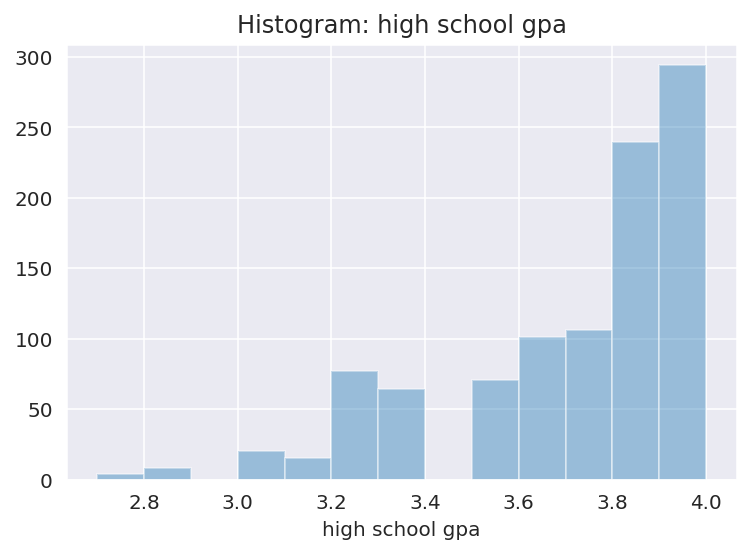

In [9]:
sns.distplot(df['high school gpa'], bins=None, kde=False)
plt.title('Histogram: high school gpa')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


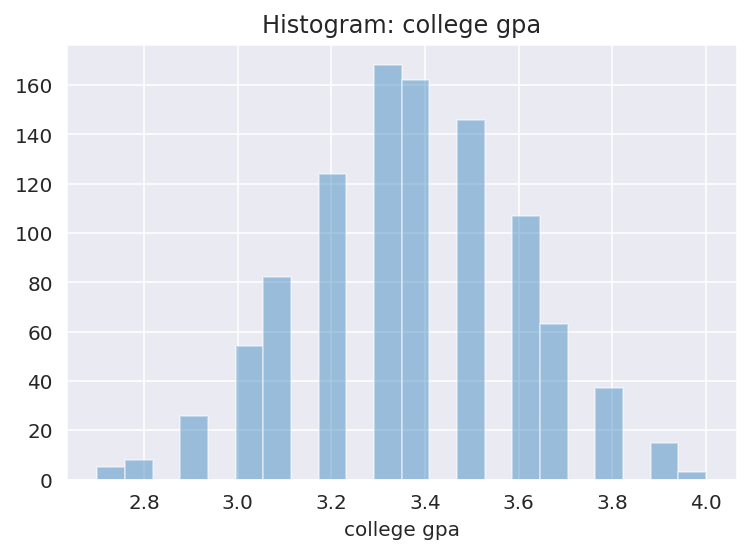

In [10]:
sns.distplot(df['college gpa'], bins=None, kde=False)
plt.title('Histogram: college gpa')
plt.show()

### 1.6 Pie charts

The library ``seaborn`` currently has no function to create pie charts (likely due to the fact that this type of visualisation is often discouraged). The ``matplotlib`` function ``pie`` (``matplotlib.pyplot.pie``) can be used to depict an array of frequencies by a pie chart. For example, we may display the frequencies of ``parental level of education`` computed in the data summarization section.

In [ ]:
freq_education

some college          0.224
associate's degree    0.213
high school           0.196
some high school      0.196
bachelor's degree     0.103
master's degree       0.068
Name: parental level of education, dtype: float64

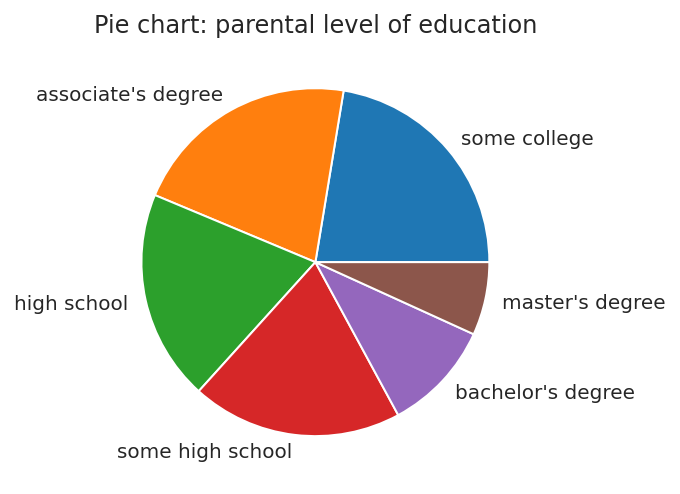

In [ ]:
plt.pie(freq_education, labels=freq_education.index)
plt.title('Pie chart: parental level of education')
plt.show()

### 1.7 Box Plots

The function ``boxplot`` can be used to create a box plot for a specific feature. For example, it can be used to create a box plot for ``parental income``.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


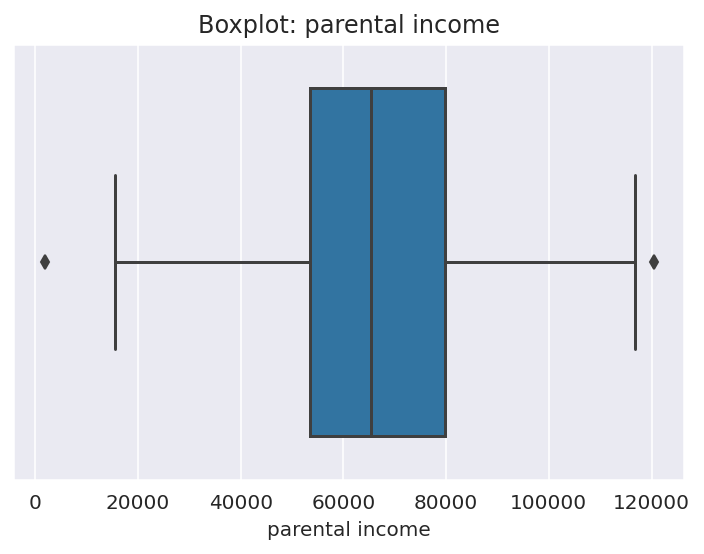

In [11]:
sns.boxplot(df['parental income'], orient='v')
plt.title('Boxplot: parental income')
plt.show()

The function ``boxplot`` is also capable of grouping observations by a categorical feature and creating one box plot for each resulting group. For example, we may create one box plot of ``parental income`` for each ``parental level of education``.

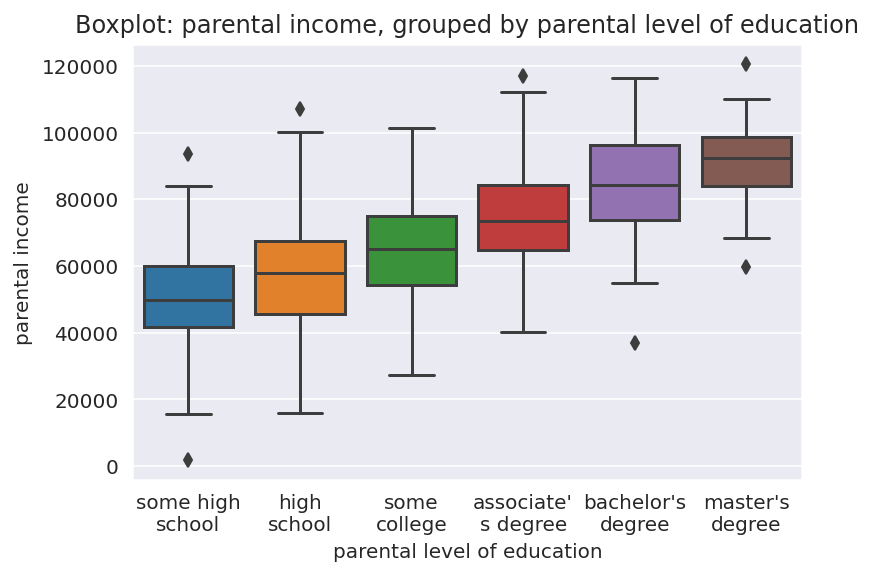

In [12]:
ax = sns.boxplot(x='parental level of education', y='parental income', data=df)
plt.title('Boxplot: parental income, grouped by parental level of education')

# Wrap xticks 
import textwrap
ax.set_xticklabels([textwrap.fill(t.get_text(), 10)  for t in ax.get_xticklabels()])

plt.show()


### 1.8 Scatter plots

The function ``scatterplot`` can be used to create a scatter plot for any given pair of features, while the function ``pairplot`` can be used to create a scatter plot matrix. 

The resulting points can be coloured according to a categorical feature given by the parameter ``hue``.

In [ ]:
sns.scatterplot(x='ACT composite score', y='SAT total score', data=df)
plt.show()


sns.pairplot(df, hue='parental level of education', diag_kind='hist')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

### 1.9 Distance matrices

In order to visualise a distance matrix, it is often important to group the observations in a dataset by a given categorical feature.

For example, we may sort the observations by increasing ``parental level of education``. Because the feature ``parental level of education`` is ordinal but not numerical, we may also decide to remove it from consideration when computing distances between observations.

Furthermore, it is always important to scale different features so that their magnitudes are comparable when computing distances. For example, we may use the ``sklearn`` class ``StandardScaler`` to standardize each feature individually. The method ``StandardScaler.fit_transform`` expects a numpy matrix containing observations across rows and returns a corresponding matrix with standardized features.

In [13]:
from sklearn.preprocessing import StandardScaler

df_sorted = df.sort_values(by='parental level of education', ascending=True)
parental_education_sorted = df_sorted['parental level of education']

X = df_sorted.drop(columns='parental level of education').to_numpy()
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X

array([[ 1.24087172,  1.0527946 , -0.11114544,  1.01350995,  0.97458022,
        -0.70714127],
       [ 0.15965907,  0.20465418,  0.31205905,  0.30747724, -0.7196053 ,
         0.71854678],
       [ 0.52006328,  0.83550242,  0.07288782,  0.6604936 ,  0.97458022,
        -1.4199853 ],
       ...,
       [-0.20074515, -0.65049566, -2.00785049, -0.39855546, -0.7196053 ,
         0.00570275],
       [-1.64236201, -1.8701356 , -0.6885511 , -2.51665359, -0.7196053 ,
        -0.70714127],
       [ 0.15965907,  0.39390865, -1.36285967,  0.6604936 , -0.29605892,
         0.00570275]])

The ``scipy`` function ``pdist`` (``scipy.spatial.distance.pdist``) can be used to compute pairwise Euclidean distances between observations in a matrix, while the function ``squareform`` (``scipy.spatial.distance.squareform``) can be used to convert the return of ``pdist`` into the representation that we expect (``pdist`` returns a condensed representation of a symmetric matrix).

Finally, the ``seaborn`` function ``heatmap`` can be used to create a heat map for the corresponding distance matrix (for a chosen colormap).


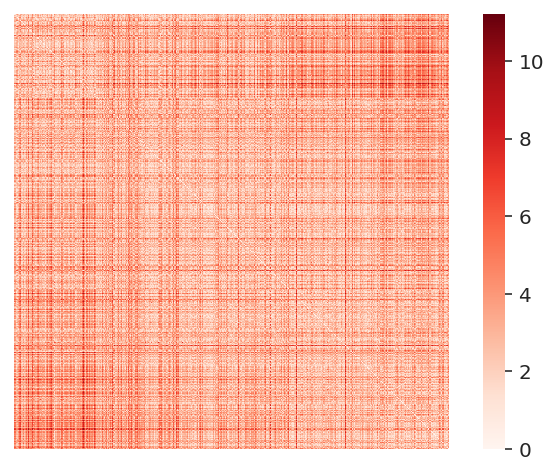

In [21]:
from scipy.spatial import distance

dist = distance.squareform(distance.pdist(X))
sns.heatmap(dist, square=True, xticklabels=False, yticklabels=False,
                cmap='Reds')
    
plt.show()

### 1.10 Dimensionality reduction

The class ``MDS`` from the library ``sklearn`` implements dimensionality reduction through multidimensional scaling. A standardized matrix of observations as the one used to compute the distance matrix in the example above is an appropriate input to the method ``MDS.fit_transform``, which outputs a matrix that contains a two-dimensional point for each observation in the input matrix. A scatter plot can be used to depict this output matrix.

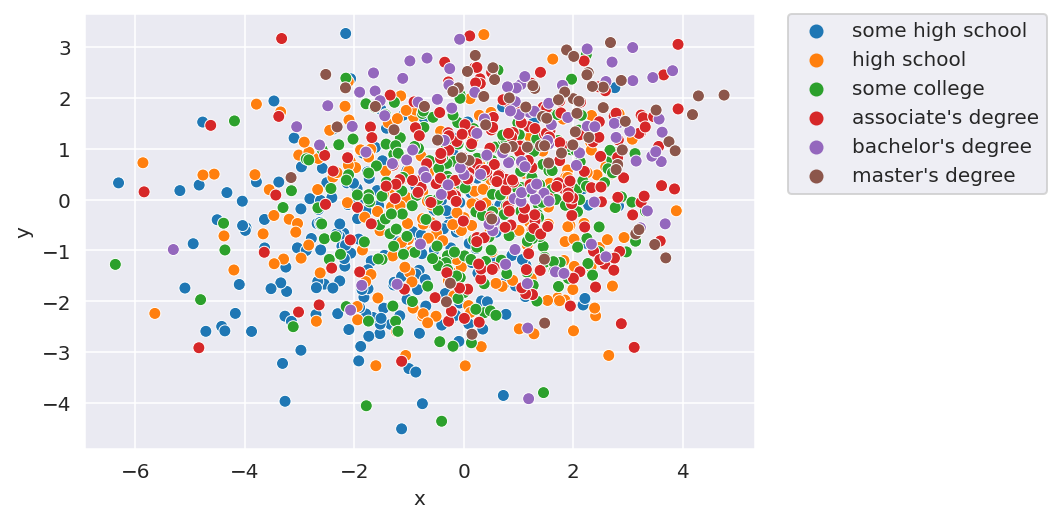

In [ ]:
from sklearn.manifold import MDS
    
embedding = MDS(n_components=2)
    
Xp = embedding.fit_transform(X)
df_projection = pd.DataFrame({'x': Xp[:, 0], 'y': Xp[:, 1],
                              'parental level of education': parental_education_sorted})

sns.scatterplot(x='x', y='y', hue='parental level of education', data=df_projection)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()


The class ``TSNE`` from the library ``sklearn`` implements dimensionality reduction through t-distributed stochastic neighbour embedding (t-SNE). Its interface is analogous to the one provided by the class ``MDS``.

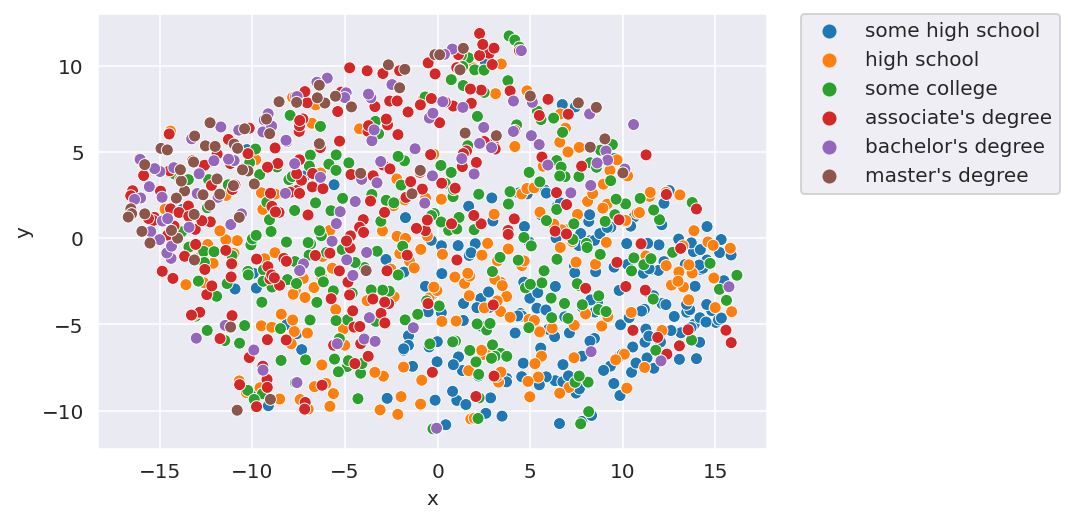

In [ ]:
from sklearn.manifold import TSNE

embedding = TSNE(n_components=2, perplexity=100)

Xp = embedding.fit_transform(X)
df_projection = pd.DataFrame({'x': Xp[:, 0], 'y': Xp[:, 1],
                              'parental level of education': parental_education_sorted})
sns.scatterplot(x='x', y='y', hue='parental level of education', data=df_projection)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In the example below, each point obtained by t-SNE is coloured according to whether the parents of the corresponding student have a higher education degree.

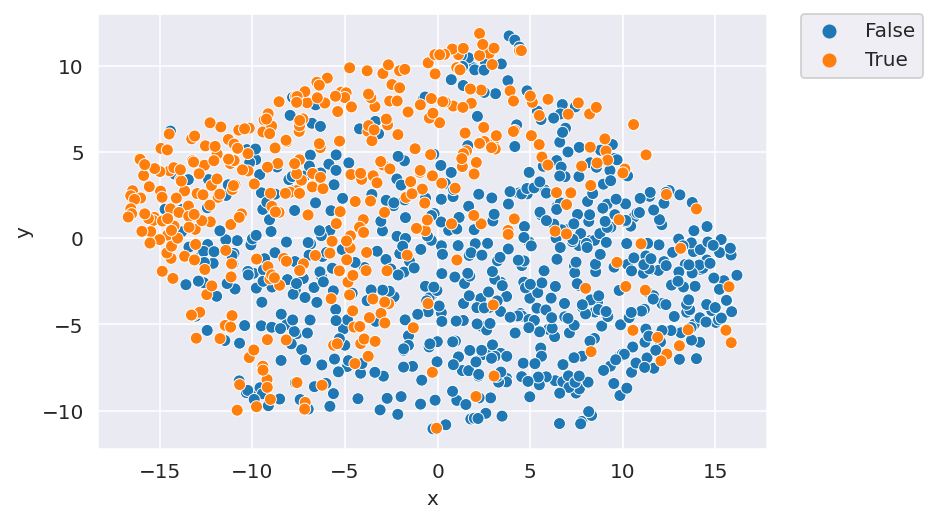

In [ ]:
df_projection['parents have degree'] = (df['parental level of education'] > 'some college')
sns.scatterplot(x='x', y='y', hue='parents have degree', data=df_projection)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

## 2 Visualising an analytic function

In order to present Python functionalities related to visualising scalar fields and vector fields, we will use the analytic function $f: \mathbb{R}^2 \to \mathbb{R}$ given by $f(x,y) = z = x^2 + y^2$ as a working example.

The ``numpy`` function ``linspace`` can be used to create a list of evenly spaced numbers in a specified interval, while the function ``meshgrid`` can be used to create all possible combinations of numbers from two given lists of numbers. 

In our example, the function ``meshgrid`` returns two matrices. The first matrix replicates the numbers of the first list across rows. In our example, this matrix represents positions along the x-axis. The second matrix replicates the numbers of the second list across columns. In our example, this matrix represents positions along the y-axis.

By applying elementwise operations that ultimately combine the two matrices, it is possible to evaluate a function of two variables on every element of a grid defined by the two lists of numbers generated by ``linspace``. The resulting dataset can also be represented by a ``DataFrame``.

In [ ]:
import numpy as np
x_range = np.linspace(-1, 1, 10)
y_range = np.linspace(-1, 1, 10)

# meshgrid: X[i, j] == x_range[j] and Y[i, j] == y_range[i]
X, Y = np.meshgrid(x_range, y_range)

# Z[i, j] == f(x_range[j], y_range[i])
Z = X**2 + Y**2

# Dataset representation
df = pd.DataFrame({'x': X.reshape(-1), 'y': Y.reshape(-1), 'z = f(x,y)': Z.reshape(-1)})
display(df)

,x,y,"z = f(x,y)"
0,-1.000000,-1.0,2.000000
1,-0.777778,-1.0,1.604938
2,-0.555556,-1.0,1.308642
3,-0.333333,-1.0,1.111111
4,-0.111111,-1.0,1.012346
...,...,...,...
95,0.111111,1.0,1.012346
96,0.333333,1.0,1.111111
97,0.555556,1.0,1.308642
98,0.777778,1.0,1.604938


### 2.1 Heat maps

The ``matplotlib`` function ``imshow`` can be used to create a heatmap through nearest neighbour interpolation.

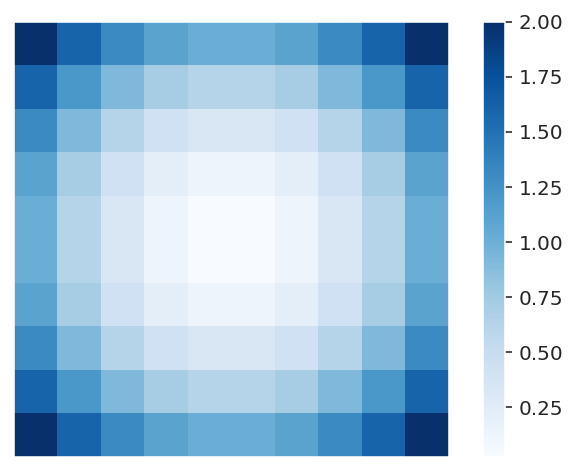

In [ ]:
# Interpolation: point (x, y) is colored according to the value z of the nearest point in the dataset
plt.imshow(Z, cmap='Blues', aspect='equal', interpolation='nearest')
plt.colorbar()

# xticks and yticks would show Z matrix indices
plt.xticks([])
plt.yticks([])

plt.show()

The ``matplotlib`` function ``imshow`` can also be used to create a heatmap through bilinear interpolation.

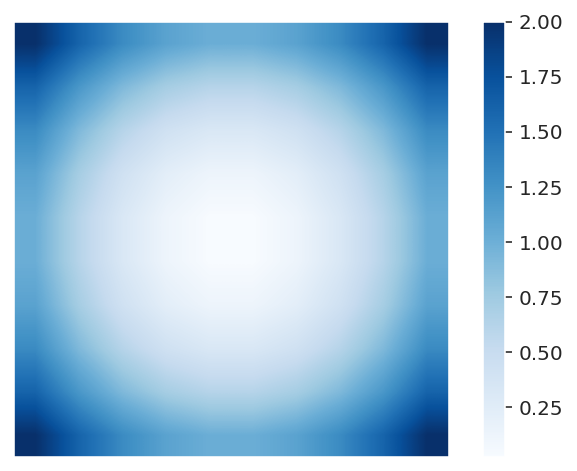

In [ ]:
# Interpolation: point (x, y) is colored according to the (weighted average) value z of the four nearest points
plt.imshow(Z, cmap='Blues', aspect='equal', interpolation='bilinear')
plt.colorbar()

# xticks and yticks would show Z matrix indices
plt.xticks([])
plt.yticks([])

plt.show()

### 2.2 Contour plots

The ``matplotlib`` function ``contour`` can be used to create a contour plot.

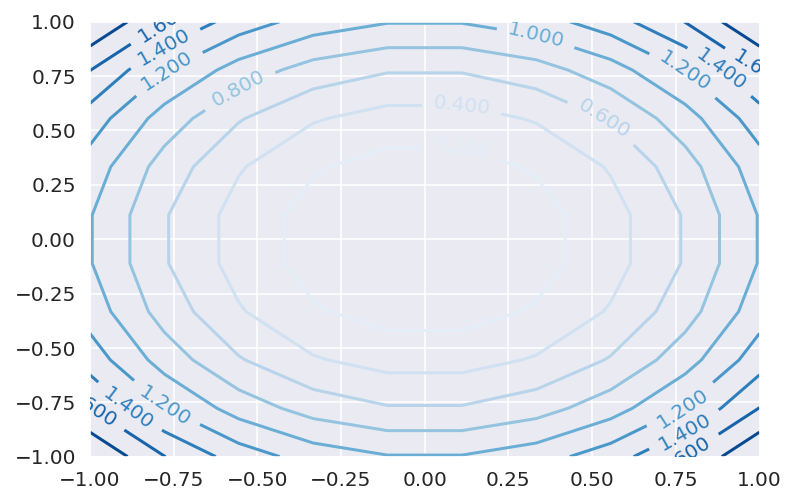

In [ ]:
CS = plt.contour(X, Y, Z, levels=10, cmap='Blues')
plt.clabel(CS, inline=True, fontsize=10)
plt.show()

### 2.3 Surface plots

The library ``matplotlib`` is also capable of creating (interactive) three-dimensional plots. Surface plots can be created using the function ``plot_surface``.

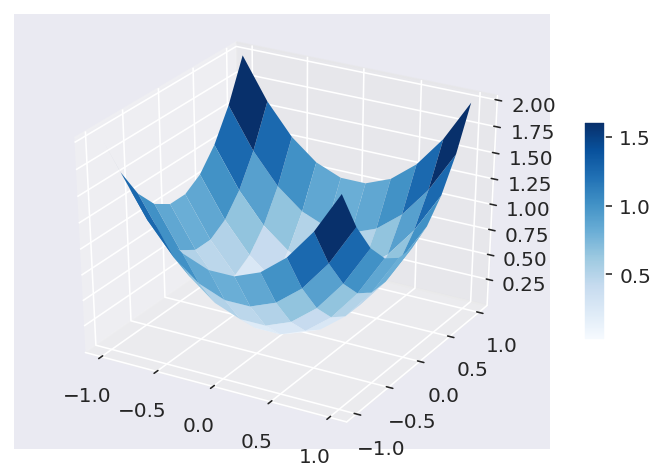

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, Y, Z, cmap='Blues', linewidth=0, antialiased=True)
fig.colorbar(surf, shrink=0.5, aspect=10)

plt.show()

### 2.4 Quiver plots

The ``matplotlib`` function ``quiver`` can be used to create quiver plots. For example, we may use the ``numpy`` function ``gradient`` to approximate the gradient function $\nabla f$ of the scalar field $f$ by the finite differences method, which can then be represented by a quiver plot.

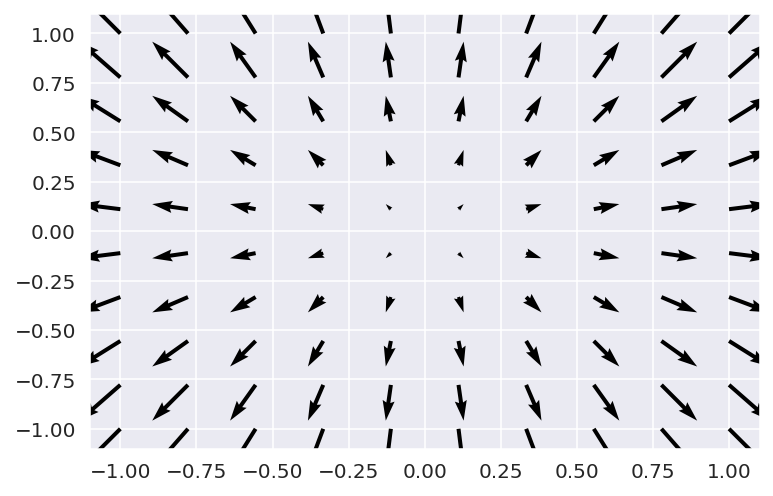

In [ ]:
DY, DX = np.gradient(Z)
plt.quiver(X, Y, DX, DY)
plt.show()

# Assignment 2 [Part 1/2]

1. In Section 1, what kind of relationship can be inferred from summary statistics regarding ``ACT composite score`` and ``SAT total score``? Which visualisations make this relationship apparent? [0.5/5]

2. Based on the box plots presented in Section 1, what is the relationship between ``parental level of education`` and ``parental income``? Using table visualisation, find and show the entire rows that correspond to the outliers regarding ``parental income`` whose parents have a master's degree. [0.5/5]

3. Using an example, explain the importance of scaling features so that their magnitudes are comparable when computing distances. [0.5/5]

4. In Section 1, the distance matrix visualisation is not very informative. However, it is still possible to infer that the average distance between students whose parents only have some high school education and students whose parents have a master's degree is larger than the average distance between students whose parents only have some high school education. Explain how this inference is possible from the visualisation. [0.5/5]

5. In Section 2, increase the number of evenly spaced numbers from 10 to 100 for both axes and observe the corresponding heat map created through nearest neighbour interpolation. Read about this interpolation method and explain what you observed. [0.5/5]

6. The function ``load_wine`` from ``sklearn.datasets`` can be used to load the *wine dataset* into a ``DataFrame`` by using the command ``df = load_wine(as_frame=True)['frame']``. 

    6.1. Load the wine dataset.Which feature is categorical? Compute the frequency of each value of the categorical feature.  [0.5/5]
    
    6.2. Compute univariate and multivariate summaries for all the numerical features. Group observations by the categorical feature and compute the corresponding **median** for each remaining numerical feature. [0.5/5]
    
    6.3. Group observations by the categorical feature and create one box plot of ``alcohol`` for each group. [0.5/5]
    
    6.4. Create a scatter plot for the pair of **distinct** numerical features with the highest correlation.  [0.5/5]
    
    6.5. Exclude the categorical feature, standardize the numerical features, and display a projection obtained by multidimensional scaling. Color the points by the categorical feature. [0.5/5]

In [ ]:
print('Grouping by parental level of education and computing the max for other features:')
display(df.groupby('parental level of education').max())

print('Grouping by parental level of education and computing the min for other features:')
display(df.groupby('parental level of education').min())

Grouping by parental level of education and computing the max for other features:


KeyError: ignored